In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
from torch import nn
from torch import optim
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, models
from torch.autograd import Variable
import torch.utils.data as data
import pandas as pd
import os
from PIL import Image
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import ImageFolder

In [3]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(DEVICE)

cuda


In [4]:
# paths for (labeled) training & validation data.
train_path = '/content/drive/MyDrive/FashionClassification/Train/'
valid_path = '/content/drive/MyDrive/FashionClassification/Validation/'
aug_path = '/content/drive/MyDrive/FashionClassification/Aug2/'

In [5]:
#계속 같은 결과 나오도록 하는 코드 (https://hoya012.github.io/blog/reproducible_pytorch/)
#random_seed 숫자만 바꿔가면서 코드 실행하면돼!
import random

random_seed = 42

torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
#torch.backends.cudnn.deterministic = True  #계산속도 느려질 수 있대 너무 느려지면 주석처리하기
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

In [ ]:
#이미 데이터 늘린 코드라 안돌려도돼!
# import random
# import os
# import cv2
# import glob
# from PIL import Image
# import PIL.ImageOps    

# #다음 변수를 수정하여 새로 만들 이미지 갯수를 정합니다.
# num_augmented_images = 100

# file_path1 = '/content/drive/MyDrive/FashionClassification/Train/Sporty'
# file_path2 = '/content/drive/MyDrive/FashionClassification/Train/Retro'
# file_path3 = '/content/drive/MyDrive/FashionClassification/Train/Resort'
# file_names1 = os.listdir(file_path1)
# file_names2 = os.listdir(file_path2)
# file_names3 = os.listdir(file_path3)

# save_path1 = '/content/drive/MyDrive/FashionClassification/Aug/Sporty/'
# save_path2 = '/content/drive/MyDrive/FashionClassification/Aug/Retro/'
# save_path3 = '/content/drive/MyDrive/FashionClassification/Aug/Resort/'
# total_origin_image_num = len(file_names1)
# augment_cnt = 1

# for i in range(1, num_augmented_images):
#     change_picture_index = random.randrange(1, total_origin_image_num-1)
#     print(change_picture_index)
#     #print(file_names[change_picture_index])
#     file_name1 = file_names1[change_picture_index]
#     file_name2 = file_names2[change_picture_index]
#     file_name3 = file_names3[change_picture_index]

#     origin_image_path1 = file_path1 +'/'+ file_name1
#     origin_image_path2 = file_path2 + '/'+file_name2
#     origin_image_path3 = file_path3 + '/'+file_name3

#     #print(origin_image_path)
#     image1 = Image.open(origin_image_path1)
#     image2 = Image.open(origin_image_path2)
#     image3 = Image.open(origin_image_path3)

#     random_augment = random.randrange(1,3)
    
#     if(random_augment == 1):
#         #이미지 좌우 반전
#         print("invert")
#         inverted_image1 = image1.transpose(Image.FLIP_LEFT_RIGHT)
#         inverted_image2 = image2.transpose(Image.FLIP_LEFT_RIGHT)
#         inverted_image3 = image3.transpose(Image.FLIP_LEFT_RIGHT)

#         inverted_image1.save(save_path1 + 'inverted_' + str(augment_cnt) + '.png')
#         inverted_image2.save(save_path2 + 'inverted_' + str(augment_cnt) + '.png')
#         inverted_image3.save(save_path3 + 'inverted_' + str(augment_cnt) + '.png')

#     elif(random_augment == 2):
#         #이미지 기울이기
#         print("rotate")
#         rotated_image1 = image1.rotate(random.randrange(-30, 30))
#         rotated_image2 = image2.rotate(random.randrange(-30, 30))
#         rotated_image3 = image3.rotate(random.randrange(-30, 30))

#         rotated_image1.save(save_path1 + 'rotated_' + str(augment_cnt) + '.png')
#         rotated_image2.save(save_path2 + 'rotated_' + str(augment_cnt) + '.png')
#         rotated_image3.save(save_path3 + 'rotated_' + str(augment_cnt) + '.png')
        
#     # elif(random_augment == 3):
#     #     #노이즈 추가하기
#     #     img1 = cv2.imread(origin_image_path1)
#     #     img2 = cv2.imread(origin_image_path2)
#     #     img3 = cv2.imread(origin_image_path3)

#     #     print("noise")
#     #     row1,col1,ch1= img1.shape
#     #     row2,col2,ch2= img2.shape
#     #     row3,col3,ch3= img3.shape

#     #     mean = 0
#     #     var = 0.1
#     #     sigma = var**0.5
#     #     gauss1 = np.random.normal(mean,sigma,(row1,col1,ch1))
#     #     gauss2 = np.random.normal(mean,sigma,(row2,col2,ch2))
#     #     gauss3 = np.random.normal(mean,sigma,(row3,col3,ch3))

#     #     gauss1 = gauss1.reshape(row1,col1,ch1)
#     #     gauss2 = gauss2.reshape(row2,col2,ch2)
#     #     gauss3 = gauss3.reshape(row3,col3,ch3)

#     #     noisy_array1 = img1 + gauss1
#     #     noisy_array2 = img2 + gauss2
#     #     noisy_array3 = img3 + gauss3

#     #     noisy_image1 = Image.fromarray(np.uint8(noisy_array1)).convert('RGB')
#     #     noisy_image2 = Image.fromarray(np.uint8(noisy_array2)).convert('RGB')
#     #     noisy_image3 = Image.fromarray(np.uint8(noisy_array3)).convert('RGB')

#     #     noisy_image1.save(save_path1 + 'noiseAdded_' + str(augment_cnt) + '.png')
#     #     noisy_image2.save(save_path2 + 'noiseAdded_' + str(augment_cnt) + '.png')
#     #     noisy_image3.save(save_path3 + 'noiseAdded_' + str(augment_cnt) + '.png')

#     augment_cnt += 1
    

In [6]:
# prepare training data set
classes = ['Resort', 'Retro', 'Sporty']

data =[]
label =[]

## i : Integer representation for each classes (Resort/Retro/Sporty -> 0/1/2)
for i, d in enumerate(classes):
    files = os.listdir(train_path+'/'+d)
    
    for f in files:
        img = Image.open(train_path+'/'+d+'/'+f,'r')
        img = img.resize((227, 227)) #(150,150)
        img = np.asarray(np.float32(img))
        data.append(img.transpose(2,0,1))  # (150,150,3) --> (3,150,150)
        label.append(i)

for i, d in enumerate(classes):
    files = os.listdir(aug_path+'/'+d)
    
    for f in files:
        img = Image.open(aug_path+'/'+d+'/'+f,'r')
        img = img.resize((227, 227)) #(150,150)
        img = np.asarray(np.float32(img))
        data.append(img.transpose(2,0,1))  # (150,150,3) --> (3,150,150)
        label.append(i)     
        
data = np.array(data, dtype='float32')
label = np.array(label, dtype='int64')

train_X = torch.from_numpy(data) #numpy to tensor
train_Y = torch.from_numpy(label)

train_X = train_X.type(torch.cuda.FloatTensor) #32bit
train_Y = train_Y.type(torch.cuda.LongTensor) #For CrossEntropy Loss

train_dataset = TensorDataset(train_X,train_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [7]:
data.shape, label.shape  # check

((14397, 3, 227, 227), (14397,))

In [8]:
# prepare validation data set
data =[]
label =[]

for i, d in enumerate(classes):
    files = os.listdir(valid_path+'/'+d)
    
    for f in files:
        img = Image.open(valid_path+'/'+d+'/'+f,'r')
        img = img.resize((227, 227))
        img = np.asarray(np.float32(img))
        data.append(img.transpose(2,0,1)) # (150,150,3) --> (3,150,150)
        label.append(i)
        
data = np.array(data, dtype='float32')
label = np.array(label, dtype='int64')

valid_X = torch.from_numpy(data)
valid_Y = torch.from_numpy(label)

valid_X = valid_X.type(torch.cuda.FloatTensor)
valid_Y = valid_Y.type(torch.cuda.LongTensor)

valid_dataset = TensorDataset(valid_X,valid_Y)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [9]:
data.shape, label.shape  # check

((1800, 3, 227, 227), (1800,))

In [10]:
# Build convolutional neural net
# DenseNet BottleNeck
class BottleNeck(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super().__init__()
        inner_channels = 4 * growth_rate

        self.residual = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, inner_channels, 1, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(inner_channels),
            nn.ReLU(),
            nn.Conv2d(inner_channels, growth_rate, 3, stride=1, padding=1, bias=False)
        )

        self.shortcut = nn.Sequential()

    def forward(self, x):
        return torch.cat([self.shortcut(x), self.residual(x)], 1)


# Transition Block: reduce feature map size and number of channels
class Transition(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.down_sample = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, 1, stride=1, padding=0, bias=False),
            nn.AvgPool2d(2, stride=2)
        )

    def forward(self, x):
        return self.down_sample(x)

# DenseNet
class DenseNet(nn.Module):
    def __init__(self, nblocks, growth_rate=12, reduction=0.5, num_classes=3, init_weights=False): #이부분 바꿔야하나?
        super().__init__()

        self.growth_rate = growth_rate
        inner_channels = 2 * growth_rate # output channels of conv1 before entering Dense Block

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, inner_channels, 7, stride=2, padding=3),
            nn.MaxPool2d(3, 2, padding=1)
        )

        self.features = nn.Sequential()

        for i in range(len(nblocks)-1):
            self.features.add_module('dense_block_{}'.format(i), self._make_dense_block(nblocks[i], inner_channels))
            inner_channels += growth_rate * nblocks[i]
            out_channels = int(reduction * inner_channels)
            self.features.add_module('transition_layer_{}'.format(i), Transition(inner_channels, out_channels))
            inner_channels = out_channels 
        
        self.features.add_module('dense_block_{}'.format(len(nblocks)-1), self._make_dense_block(nblocks[len(nblocks)-1], inner_channels))
        inner_channels += growth_rate * nblocks[len(nblocks)-1]
        self.features.add_module('bn', nn.BatchNorm2d(inner_channels))
        self.features.add_module('relu', nn.ReLU())

        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.linear = nn.Linear(inner_channels, num_classes)

        # weight initialization
        if init_weights:
            self._initialize_weights()
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.features(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        return x

    def _make_dense_block(self, nblock, inner_channels):
        dense_block = nn.Sequential()
        for i in range(nblock):
            dense_block.add_module('bottle_neck_layer_{}'.format(i), BottleNeck(inner_channels, self.growth_rate))
            inner_channels += self.growth_rate
        return dense_block

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

def DenseNet_121():
    return DenseNet([6, 12, 24, 16])

model = DenseNet_121().to(DEVICE)  # 모델 GPU로
model # Print network

DenseNet(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (features): Sequential(
    (dense_block_0): Sequential(
      (bottle_neck_layer_0): BottleNeck(
        (residual): Sequential(
          (0): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU()
          (2): Conv2d(24, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (4): ReLU()
          (5): Conv2d(48, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (shortcut): Sequential()
      )
      (bottle_neck_layer_1): BottleNeck(
        (residual): Sequential(
          (0): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU()
          (2): Conv2d(36, 48

In [11]:
from torchsummary import summary
summary(model, (3, 227, 227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 24, 114, 114]           3,552
         MaxPool2d-2           [-1, 24, 57, 57]               0
       BatchNorm2d-3           [-1, 24, 57, 57]              48
              ReLU-4           [-1, 24, 57, 57]               0
            Conv2d-5           [-1, 48, 57, 57]           1,152
       BatchNorm2d-6           [-1, 48, 57, 57]              96
              ReLU-7           [-1, 48, 57, 57]               0
            Conv2d-8           [-1, 12, 57, 57]           5,184
        BottleNeck-9           [-1, 36, 57, 57]               0
      BatchNorm2d-10           [-1, 36, 57, 57]              72
             ReLU-11           [-1, 36, 57, 57]               0
           Conv2d-12           [-1, 48, 57, 57]           1,728
      BatchNorm2d-13           [-1, 48, 57, 57]              96
             ReLU-14           [-1, 48,

In [ ]:
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)


In [12]:
# training
def run_train(model):
    model.train()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

    total_loss = 0
    correct = 0
    incorrect = 0
    
    for inputs, labels in train_loader:
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        output = model(inputs)
        idx, pred = output.max(1)
        pred = (pred.detach().cpu().numpy())
        truth = (labels.detach().cpu().numpy())
        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.data.item()
        
        for ix in range(len(pred)):
            if pred[ix] == truth[ix]:
                correct = correct +1
            else:
                incorrect = incorrect +1
        accuracy = (correct/(correct+incorrect))*100
        train_img = inputs.cpu().numpy()
        
    return train_img, pred, truth, accuracy, total_loss

In [13]:
# Validation
def run_valid(model):
    model.eval()
    criterion = nn.CrossEntropyLoss()
   # optimizer = optim.Adam(model.parameters(), lr=0.0001)
    
    total_loss = 0
    correct = 0
    incorrect = 0
    
    for inputs, labels in valid_loader:
        inputs, labels = Variable(inputs), Variable(labels)
        #optimizer.zero_grad()
        output = model(inputs)
        idx, pred = output.max(1)
        pred = (pred.detach().cpu().numpy())
        truth = (labels.detach().cpu().numpy())
        # print('Valid_Prediction : {}'.format(pred))
        # print('Valid_Truth : {}'.format(truth))
        
        loss = criterion(output, labels)
        total_loss += loss.data.item()
        
        for ix in range(len(pred)):
            if pred[ix] == truth[ix]:
                correct = correct +1
            else:
                incorrect = incorrect +1
        accuracy = (correct/(correct+incorrect))*100
        valid_img = inputs.cpu().numpy()
        
    return valid_img, pred, truth, accuracy, total_loss

***START EPOCH***
# Epoch : 0 /100
Train Accuracy : 53.84455094811419
Validation Accuracy : 58.27777777777777
Train Loss : 215.31174784898758
Validation Loss : 50.86130350828171
# Epoch : 1 /100
Train Accuracy : 63.27707161214142
Validation Accuracy : 58.94444444444444
Train Loss : 184.78796994686127
Validation Loss : 53.22127115726471
# Epoch : 2 /100
Train Accuracy : 68.16003334027923
Validation Accuracy : 61.44444444444444
Train Loss : 165.2699174284935
Validation Loss : 49.03674599528313
# Epoch : 3 /100
Train Accuracy : 72.57762033757032
Validation Accuracy : 65.44444444444444
Train Loss : 145.98378935456276
Validation Loss : 44.46663585305214
# Epoch : 4 /100
Train Accuracy : 76.87712717927346
Validation Accuracy : 62.44444444444445
Train Loss : 128.6527619957924
Validation Loss : 53.815814699977636
# Epoch : 5 /100
Train Accuracy : 80.23893866777802
Validation Accuracy : 66.33333333333333
Train Loss : 110.72542715072632
Validation Loss : 45.93226411938667
# Epoch : 6 /100
Train 

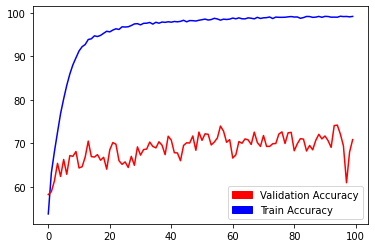

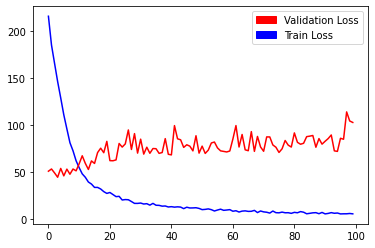

<All keys matched successfully>

In [14]:
# Learning
import copy

acc_t = []
acc_v = []

loss_train = []
loss_val = []

print('***START EPOCH***')
best_acc = 0.0  # beset accuracy 초기화
best_model_wts = copy.deepcopy(model.state_dict()) 

for epoch in range(100):
    print('# Epoch : {} /100'.format(epoch))
    train_img, pred_t, truth_t, accuracy_t, loss_t = run_train(model)
    valid_img, pred_v, truth_v, accuracy_v, loss_v = run_valid(model)
    #if epoch%4 == 0:
    print('Train Accuracy : {}'.format(accuracy_t))
    print('Validation Accuracy : {}'.format(accuracy_v))
    print('Train Loss : {}'.format(loss_t))
    print('Validation Loss : {}'.format(loss_v))
    acc_t.append(accuracy_t)
    acc_v.append(accuracy_v)
    loss_train.append(loss_t)
    loss_val.append(loss_v)

    if accuracy_v>best_acc:  # update best accuracy
      best_acc = accuracy_v
      best_model_wts = copy.deepcopy(model.state_dict())  # 가장 accuracy 높은 model 저장

plt.plot(range(len(acc_t)), acc_t, 'b', range(len(acc_v)), acc_v, 'r')
blue_patch = mpatches.Patch(color='blue', label='Train Accuracy')
red_patch = mpatches.Patch(color='red', label='Validation Accuracy')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

# Loss Graph
plt.plot(range(len(loss_train)), loss_train, 'b', range(len(loss_val)), loss_val, 'r')
blue_patch = mpatches.Patch(color='blue', label='Train Loss')
red_patch = mpatches.Patch(color='red', label='Validation Loss')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

model.load_state_dict(best_model_wts) # validation accuracy, 가장 높은 모델 저장


In [15]:
torch.save(model,'/content/drive/MyDrive/FashionClassification/근아 tuning/TeamB_Densenet_guena')

In [16]:
def evaluate(model, test_loader):
    model.eval()      # 모델 평가 상태로
    test_loss = 0     # test_loss 초기화
    correct = 0       # 맞게 예측한 0 값으로 초기화
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

    with torch.no_grad(): 
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)     # data, target DEVICE에 할당
            output = model(data)                                  # output 계산
            test_loss += criterion(output, target).item()         # loss 계산(총 loss 에 더해주기)
            pred = output.max(1, keepdim=True)[1]                 # 계산된 벡터값 중 가장 큰 값 가지는 class 예측
            correct += pred.eq(target.view_as(pred)).sum().item() # 맞게 예측한 값 세기
   
    test_loss /= len(test_loader.dataset)                         # 평균 loss
    test_accuracy = 100. * correct / len(test_loader.dataset)     # test(validation) 데이터 정확도
    return test_loss, test_accuracy

In [17]:
model=torch.load('/content/drive/MyDrive/FashionClassification/근아 tuning/TeamB_Densenet_guena')
#model.eval()
_, train_acc = evaluate(model, train_loader)
_, val_acc = evaluate(model, valid_loader)

# prit saved model's train and validation accuracy
print('Train Accuracy: {:.4f}'.format(train_acc))
print('Validation Accuracy: {:.4f}'.format(val_acc))

Train Accuracy: 99.7152
Validation Accuracy: 74.2222


In [18]:
from sklearn.metrics import classification_report
def prediction(model, data_loader):
    model.eval()
    predlist=torch.zeros(0,dtype=torch.long, device='cpu')
    lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
    
    with torch.no_grad():
      for i, (data, label) in enumerate(data_loader):
        data = data.to(DEVICE)        # 데이터 DEVICE에 할당
        label = label.to(DEVICE)      # 라벨 값 DEVICE에 할당
        outputs = model(data)         # 예측
        _, preds = torch.max(outputs, 1)  # 가장 높은 확률 가지는 class 예측

        # Batch 단위 예측값 append 하기
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,label.view(-1).cpu()])
        
    # Classification Report
    print(classification_report(lbllist.numpy(), predlist.numpy())) # 클래스별 accuracy, recall, f1-score 
    return

In [19]:
prediction(model, valid_loader)

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       600
           1       0.78      0.77      0.77       600
           2       0.81      0.71      0.76       600

    accuracy                           0.74      1800
   macro avg       0.75      0.74      0.74      1800
weighted avg       0.75      0.74      0.74      1800

